In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Modifique o caminho se necessário para fazer a leitura dos dados
url = "https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/DadoseDecisoes.csv"

# Dados banco - Leitura dos dados
dados = pd.read_csv(url)

dados


,ID,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office
0,1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não
1,2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim
2,3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim
3,4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim
4,5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não
...,...,...,...,...,...,...,...,...,...,...,...
225,226,36,Feminino,RH,3711.26,34,81.89,76.52,9,1,Não
226,227,21,Feminino,Marketing,2536.32,34,85.63,100.00,0,0,Não
227,228,43,Feminino,Vendas,5717.90,38,86.55,82.46,12,11,Não
228,229,48,Feminino,Marketing,15638.38,38,85.72,68.05,14,5,Não


In [2]:
dados.columns

Index(['ID', 'Idade', 'Gênero', 'Departamento', 'Salário', 'Horas_Trabalhadas',
       'Produtividade', 'Satisfação', 'Tempo_Empresa', 'Cursos_Realizados',
       'Home_Office'],
      dtype='object')

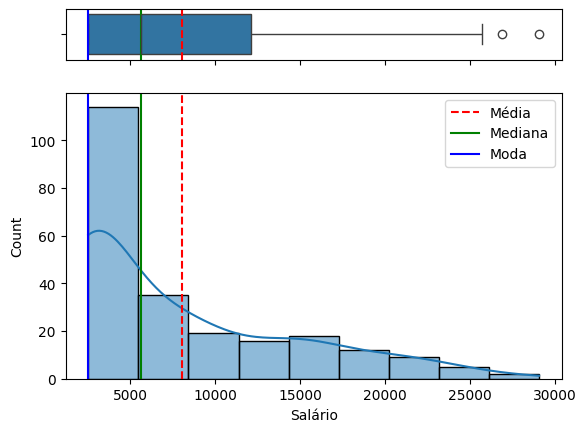

In [3]:
# Cálculo das medidas descritivas, média, mediana e moda

mean=dados['Salário'].mean()
median=dados['Salário'].median()
mode=dados['Salário'].mode().values[0]


# Aqui criamos as "molduras" (ax_box e ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})


#Gráfico de caixa ou boxplot com medidas descritivas indicadas
sns.boxplot(data=dados,x='Salário',ax=ax_box)
ax_box.axvline(mean,color='r',linestyle='--',label='Média')
ax_box.axvline(median,color='g',linestyle='-',label='Mediana')
ax_box.axvline(mode,color='b',linestyle='-',label='Moda')

# Histograma com medidas descritivas indicadas
sns.histplot(data=dados,x='Salário',ax=ax_hist,kde=True)
ax_hist.axvline(mean,color='r',linestyle='--',label='Média')
ax_hist.axvline(median,color='g',linestyle='-',label='Mediana')
ax_hist.axvline(mode,color='b',linestyle='-',label='Moda')

plt.legend()
plt.show()

In [4]:


mediana_salario=dados['Salário'].median()

nivelSalario=lambda x:'Alto' if x>=median else 'Baixo'

# Criar variável binária nivelSalario (0 para salário abaixo do valor de corte, 1 para salários acima)

dados['nivelSalário']=dados['Salário'].apply(nivelSalario)

dados.head()



,ID,Idade,Gênero,Departamento,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados,Home_Office,nivelSalário
0,1,34,Masculino,RH,3848.89,36,84.89,94.33,0,4,Não,Baixo
1,2,39,Feminino,Vendas,2536.32,48,107.84,98.62,4,9,Sim,Baixo
2,3,39,Masculino,Marketing,7377.81,44,95.66,80.23,11,6,Sim,Alto
3,4,27,Feminino,Vendas,2536.32,40,88.89,94.63,8,1,Sim,Baixo
4,5,41,Feminino,Vendas,2536.32,37,80.97,86.44,11,12,Não,Baixo


In [5]:
# Estatísticas descritivas para variáveis quantitativas

np.round(dados.describe(),2)

,ID,Idade,Salário,Horas_Trabalhadas,Produtividade,Satisfação,Tempo_Empresa,Cursos_Realizados
count,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00
mean,115.50,30.55,8029.97,38.85,87.85,86.15,6.77,5.20
std,66.54,8.22,6556.33,5.82,12.24,12.06,5.96,4.22
min,1.00,18.00,2536.32,30.00,65.74,39.42,0.00,0.00
25%,58.25,24.00,2536.32,34.00,77.12,77.57,1.00,2.00
50%,115.50,29.00,5667.56,38.00,87.04,87.73,6.00,5.00
75%,172.75,35.00,12129.21,44.00,98.42,96.19,11.00,8.00
max,230.00,54.00,29052.82,48.00,112.06,100.00,30.00,20.00


In [29]:
dados.groupby(by='Gênero')['Salário'].mean()

,Salário
Gênero,
Feminino,6612.580196
Masculino,9159.459609


<Axes: xlabel='nivelSalário', ylabel='Produtividade'>

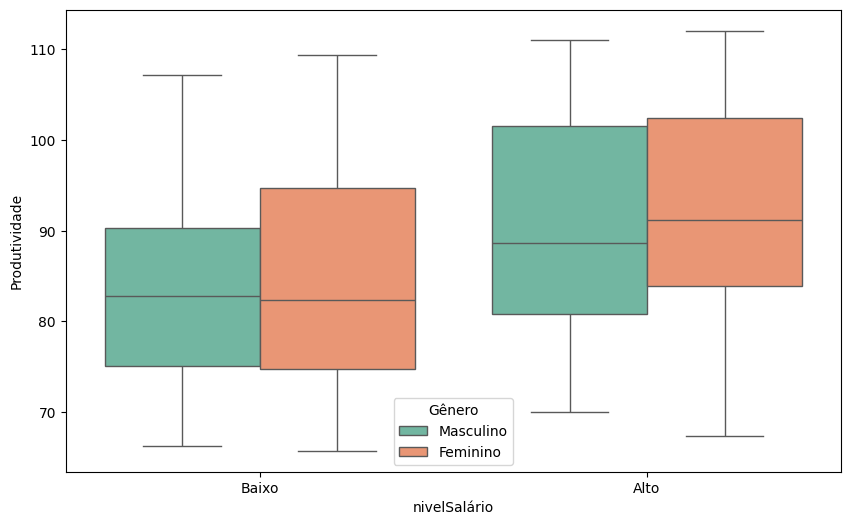

In [7]:
# Associação de variáveis com salário: depende dos tipos de variáveis

plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['nivelSalário'],y=dados['Produtividade'],hue=dados['Gênero'],palette='Set2')





<Axes: xlabel='nivelSalário', ylabel='Satisfação'>

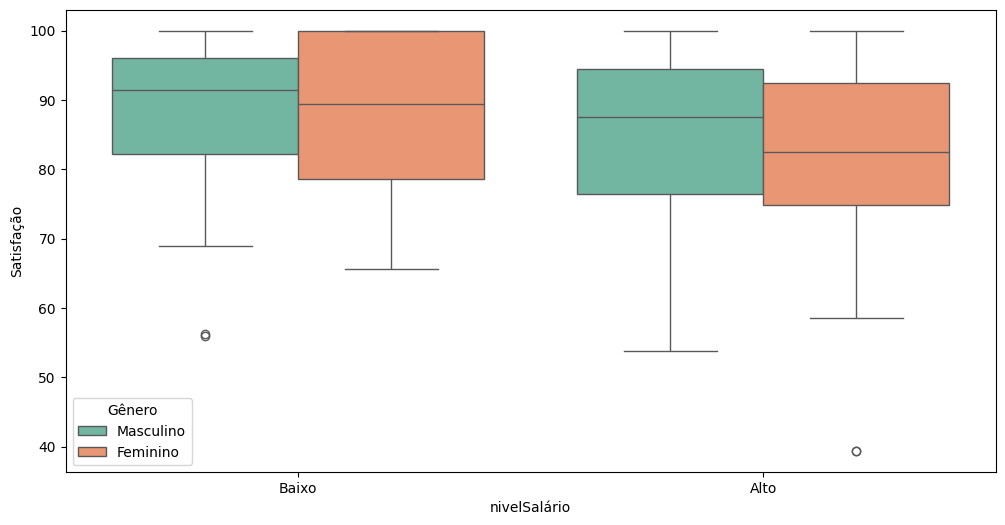

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dados['nivelSalário'],y=dados['Satisfação'],hue=dados['Gênero'],palette='Set2')




In [9]:
# Associação entre duas variáves qualitativas

# Tabela de contigência

tabela_dupla=pd.crosstab(dados['nivelSalário'],dados['Gênero'],normalize='index')
tabela_dupla

Gênero,Feminino,Masculino
nivelSalário,,
Alto,0.356522,0.643478
Baixo,0.530435,0.469565


<Axes: ylabel='nivelSalário'>

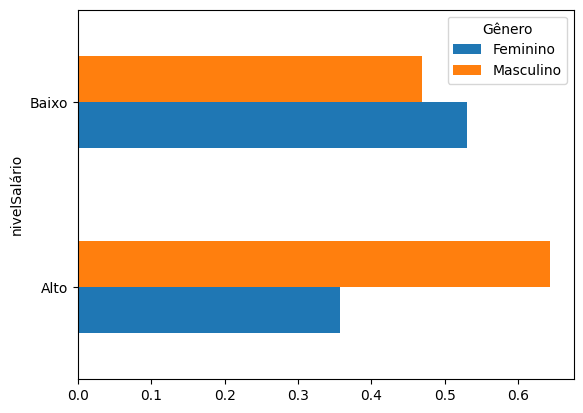

In [10]:
tabela_dupla.plot.barh()

In [14]:
tabela_dupla=pd.crosstab(index=[dados['Departamento'],dados['Gênero']],columns=dados['nivelSalário'],normalize='index')
tabela_dupla

nivelSalário                Alto     Baixo
Departamento Gênero                       
Marketing    Feminino   0.500000  0.500000
             Masculino  0.620690  0.379310
RH           Feminino   0.230769  0.769231
             Masculino  0.368421  0.631579
TI           Feminino   0.709677  0.290323
             Masculino  0.906977  0.093023
Vendas       Feminino   0.120000  0.880000
             Masculino  0.270270  0.729730

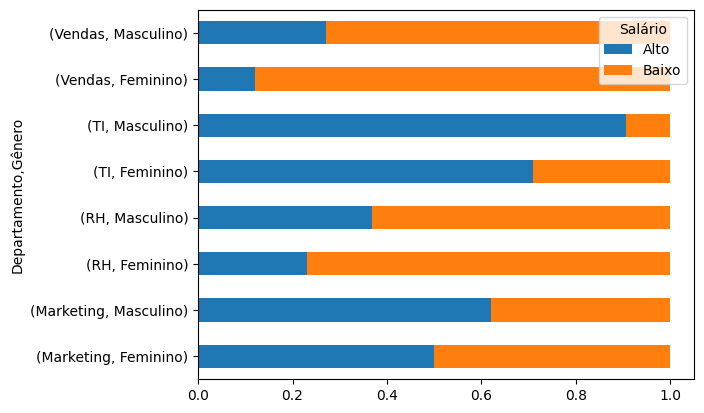

In [16]:
tabela_dupla.plot.barh(stacked="True")
plt.legend(title="Salário")
plt.show()

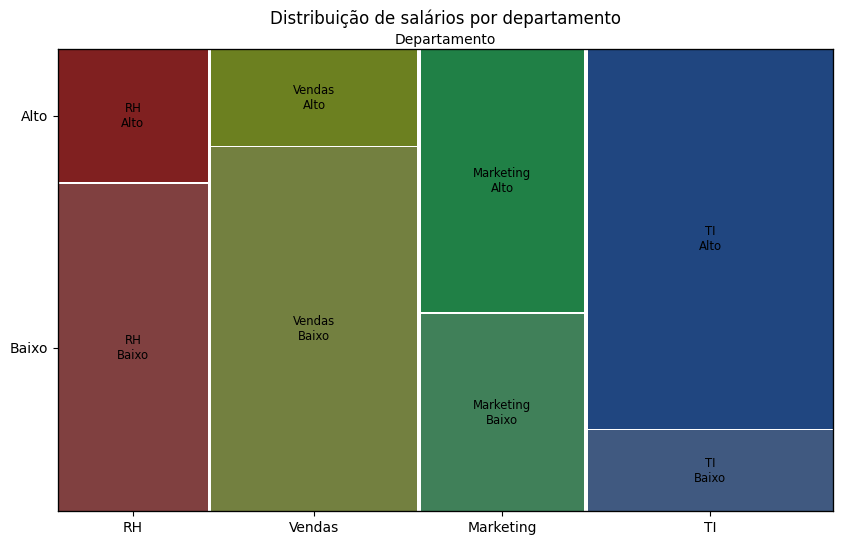

In [19]:
# Gráfico mosaico


from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = (10, 6)
mosaic(dados, ['Departamento', 'nivelSalário'])

# Adicionar rótulos e títulos
plt.title('Distribuição de salários por departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário')

plt.show()

<Axes: xlabel='Produtividade', ylabel='Satisfação'>

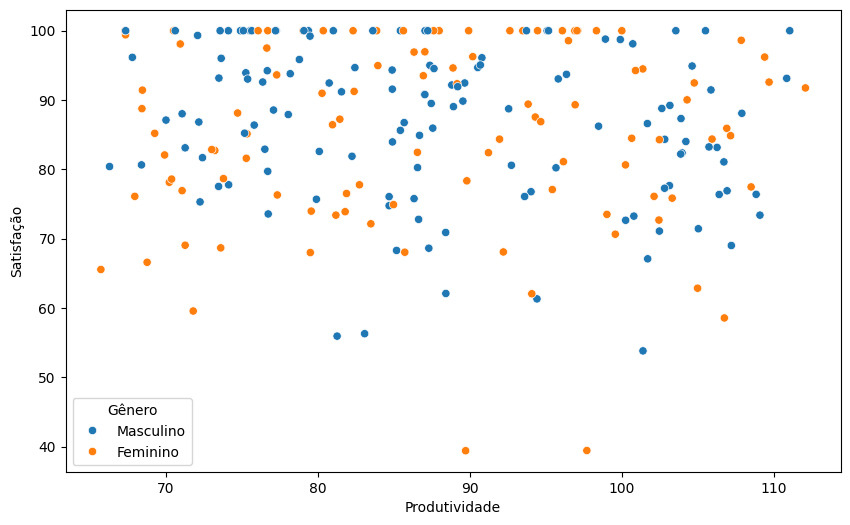

In [31]:
## Associação entre variáveis quantitativas

plt.figure(figsize=(10,6))
sns.scatterplot(data=dados,x='Produtividade',y='Satisfação',hue='Gênero',alpha=1)

